In [66]:
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import json
import sys
import csv

In [67]:
sys.path.append("../inference") # go to parent dir
sys.path.append("../utils") # go to parent dir
from prepare_captions import preprocess_json_files

In [68]:
def load_vocab(dict_file = "../outputs/vocab/5000/coco2014_vocab.json"):
    data = {}
    with open(dict_file, 'r') as f:
        dict_data = json.load(f)
        for k, v in dict_data.items():
            print(k)
            data[k] = v
    data = {int(k): v for k, v in data['idx_to_word'].items()}

    print("Loaded dictionary...")
    print("Dictionary size: {}".format(len(data)))
    return data
vocab = load_vocab()

word_to_idx
idx_to_word
Loaded dictionary...
Dictionary size: 5004


In [69]:
def decode_caption(caption):
    return [vocab[w] for w in caption if w > 3]

In [70]:
def load_caption(image_id, image_dir="../outputs/beam_captions/"):
    if type(image_id) == str:
        filename = "{}{}".format(image_dir, image_id) 
    else:
        filename = "{}{}.json".format(image_dir, image_id) 
    with open(filename, "r") as file:
        return json.load(file)

In [71]:
def load_image_idx_maps():
    with open("../outputs/val_image_id_to_idx.csv") as file:
        csv_file = csv.reader(file)
        image_id_to_index = {}
        index_to_image_id = {}
        for image_index, image_id in csv_file:
            try:
                image_idx = int(image_index)
                image_id = int(image_id)
                image_id_to_index[image_id] = image_idx
                index_to_image_id[image_idx] = image_id
            except:
                print("Error proccessing {}: {}".format(image_id, image_index))
    print("Processed {} images".format(len(image_id_to_index)))
    return image_id_to_index, index_to_image_id
image_id_to_index, index_to_image_id = load_image_idx_maps()

Error proccessing image_id: image_index
Processed 40504 images


In [72]:
def load_annotations():
    annotations = preprocess_json_files("../../annotations/")['captions_val2014.json']
    annotations_dict = {}
    for i in range(len(annotations[0])):
        caption = annotations[0][i]
        image_id = annotations[1][i]
        image_index = image_id_to_index[image_id]
        if image_index in annotations_dict:
            annotations_dict[image_index].append(caption)
        else:
            annotations_dict[image_index] = [caption]
    return annotations_dict
annotations_dict = load_annotations()

Skipping file person_keypoints_train2014.json
Skipping file instances_train2014.json
Skipping file instances_val2014.json
Skipping file person_keypoints_val2014.json


In [73]:
def print_image(image_id, image_dir = "../../val2014_2/val2014/"):
    image_path = "{}{}.jpg".format(image_dir, image_id)
    img=mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

[['a', 'horse', 'drawn', 'carriage', 'traveling', 'down', 'the', 'middle', 'of', 'a', 'road'], ['two', 'farmers', 'riding', 'in', 'a', 'hay', 'wagon', 'being', 'pulled', 'by', 'a', 'horse'], ['two', 'men', 'riding', 'hay', 'bails', 'being', 'pulled', 'by', 'a', 'horse'], ['a', 'horse', 'carrying', 'a', 'large', 'load', 'of', 'hay', 'and', 'two', 'people', 'sitting', 'on', 'it', ''], ['a', 'horse', 'pulling', 'a', 'wagon', 'of', 'hay', 'with', 'two', 'people', 'sitting', 'on', 'top', 'of', 'the', 'hay']]
a horse drawn carriage traveling down the middle of a road
two farmers riding in a hay wagon being pulled by a horse
two men riding hay bails being pulled by a horse
a horse carrying a large load of hay and two people sitting on it 
a horse pulling a wagon of hay with two people sitting on top of the hay


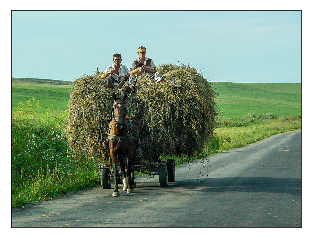

In [85]:
image_id = 53
print_image(image_id)
plt.savefig('../../dissertation/figs/example_image.png')
print(annotations_dict[image_id])
captions = [' '.join(c) for c in annotations_dict[image_id]]
for caption in captions[:10]:
    print(caption)

# 